<a href="https://colab.research.google.com/github/vTheWise/speech_language_impairment_detection/blob/baseline/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the drive (optional) 
- Mount the drive if the data is stored in the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installations

- Install all the required packages

In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import the required packages

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Utility Functions

## Loading pickled data/features/models

In [ ]:
def loadPickleData(filepath):
  data = pickle.load(open(filepath, 'rb'))
  return data

# Data Pre-Processing
- Change the file paths as needed

In [37]:
# data paths
auburnDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_disordered_features.pkl"
auburnNonDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_non_disordered_features.csv"
cincinnatiDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/cincinnati_disordered_features.pkl"
cincinnatiNonDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/cincinnati_non_disordered_features.csv"

# read disordered data
# print("reading disordered data")
auburn_disordered_features = loadPickleData(auburnDisorderedDataPath)
print("auburn disordered data size " , len(auburn_disordered_features ))
auburn_disordered_features.head()

cincinnati_disordered_features = loadPickleData(cincinnatiDisorderedDataPath)
print("cincinnati disordered data size " , len(cincinnati_disordered_features ))
cincinnati_disordered_features.head()


# read non disordered data
# print("reading non disordered data")
auburn_non_disordered_features_df = pd.read_csv(auburnNonDisorderedDataPath)
print("auburn non disordered data size " , len(auburn_non_disordered_features_df ))

cincinnati_non_disordered_features_df = pd.read_csv(cincinnatiNonDisorderedDataPath)
print("cincinnati non disordered data size " , len(cincinnati_non_disordered_features_df ))

# drop index column
auburn_non_disordered_features_df = auburn_non_disordered_features_df.drop(['Unnamed: 0'], axis = 1)
cincinnati_non_disordered_features_df = cincinnati_non_disordered_features_df.drop(['Unnamed: 0'], axis = 1)

# add labels
auburn_disordered_features['label'] = 1
auburn_non_disordered_features_df['label'] = 0
cincinnati_disordered_features['label'] = 1
cincinnati_non_disordered_features_df['label'] = 0

# concat data
auburn_full_data = pd.concat([auburn_disordered_features, auburn_non_disordered_features_df], axis = 0)
print("auburn full dataset size", len(auburn_full_data))
cincinnati_full_data = pd.concat([cincinnati_disordered_features, cincinnati_non_disordered_features_df], axis = 0)
print("cincinnati full dataset size", len(cincinnati_full_data))

# combine the auburn and cincinnati data
combined_data = pd.concat([auburn_full_data, cincinnati_full_data], axis=0)
print("combined dataset size", len(combined_data))

# set input and target variable
X = combined_data.loc[:, combined_data.columns != 'label']
y = combined_data['label']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\ntraining dataset size", len(X_train))
print("\ntest dataset size", len(X_test))

auburn disordered data size  2022
cincinnati disordered data size  433
auburn non disordered data size  5937
cincinnati non disordered data size  2008
auburn full dataset size 7959
cincinnati full dataset size 2441
combined dataset size 10400

training dataset size 8320

test dataset size 2080


# Train the models

In [38]:
# define classifier
xgb = XGBClassifier()

# train classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
# define classifier
nb = GaussianNB()

# train classifier
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
# define classifier
mlp = MLPClassifier()

# train classifier
mlp.fit(X_train, y_train)

MLPClassifier()

# Predictions and Model Evaluations

In [41]:
y_pred_xgb = xgb.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1566
           1       0.90      0.63      0.74       514

    accuracy                           0.89      2080
   macro avg       0.89      0.80      0.83      2080
weighted avg       0.89      0.89      0.88      2080



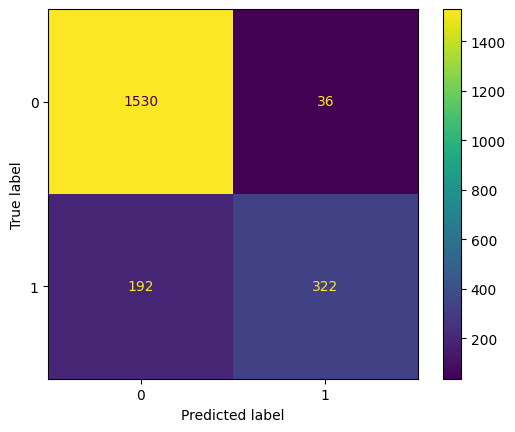

In [43]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()

In [44]:
y_pred_nb = nb.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1566
           1       0.47      0.42      0.44       514

    accuracy                           0.74      2080
   macro avg       0.64      0.63      0.64      2080
weighted avg       0.73      0.74      0.73      2080



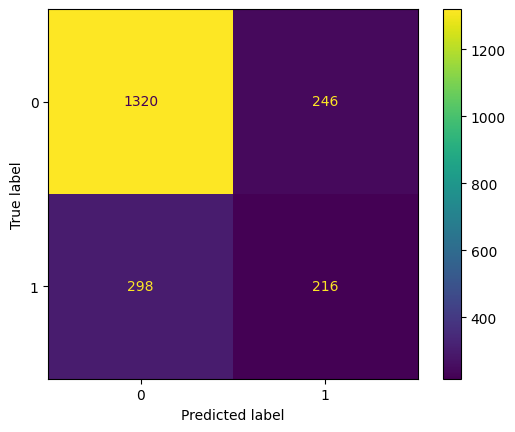

In [46]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

In [47]:
y_pred_mlp = mlp.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68      1566
           1       0.37      0.81      0.51       514

    accuracy                           0.61      2080
   macro avg       0.63      0.68      0.59      2080
weighted avg       0.77      0.61      0.64      2080



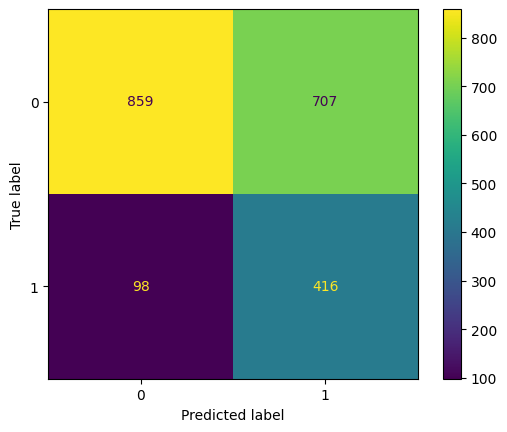

In [49]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

# Feature Importance

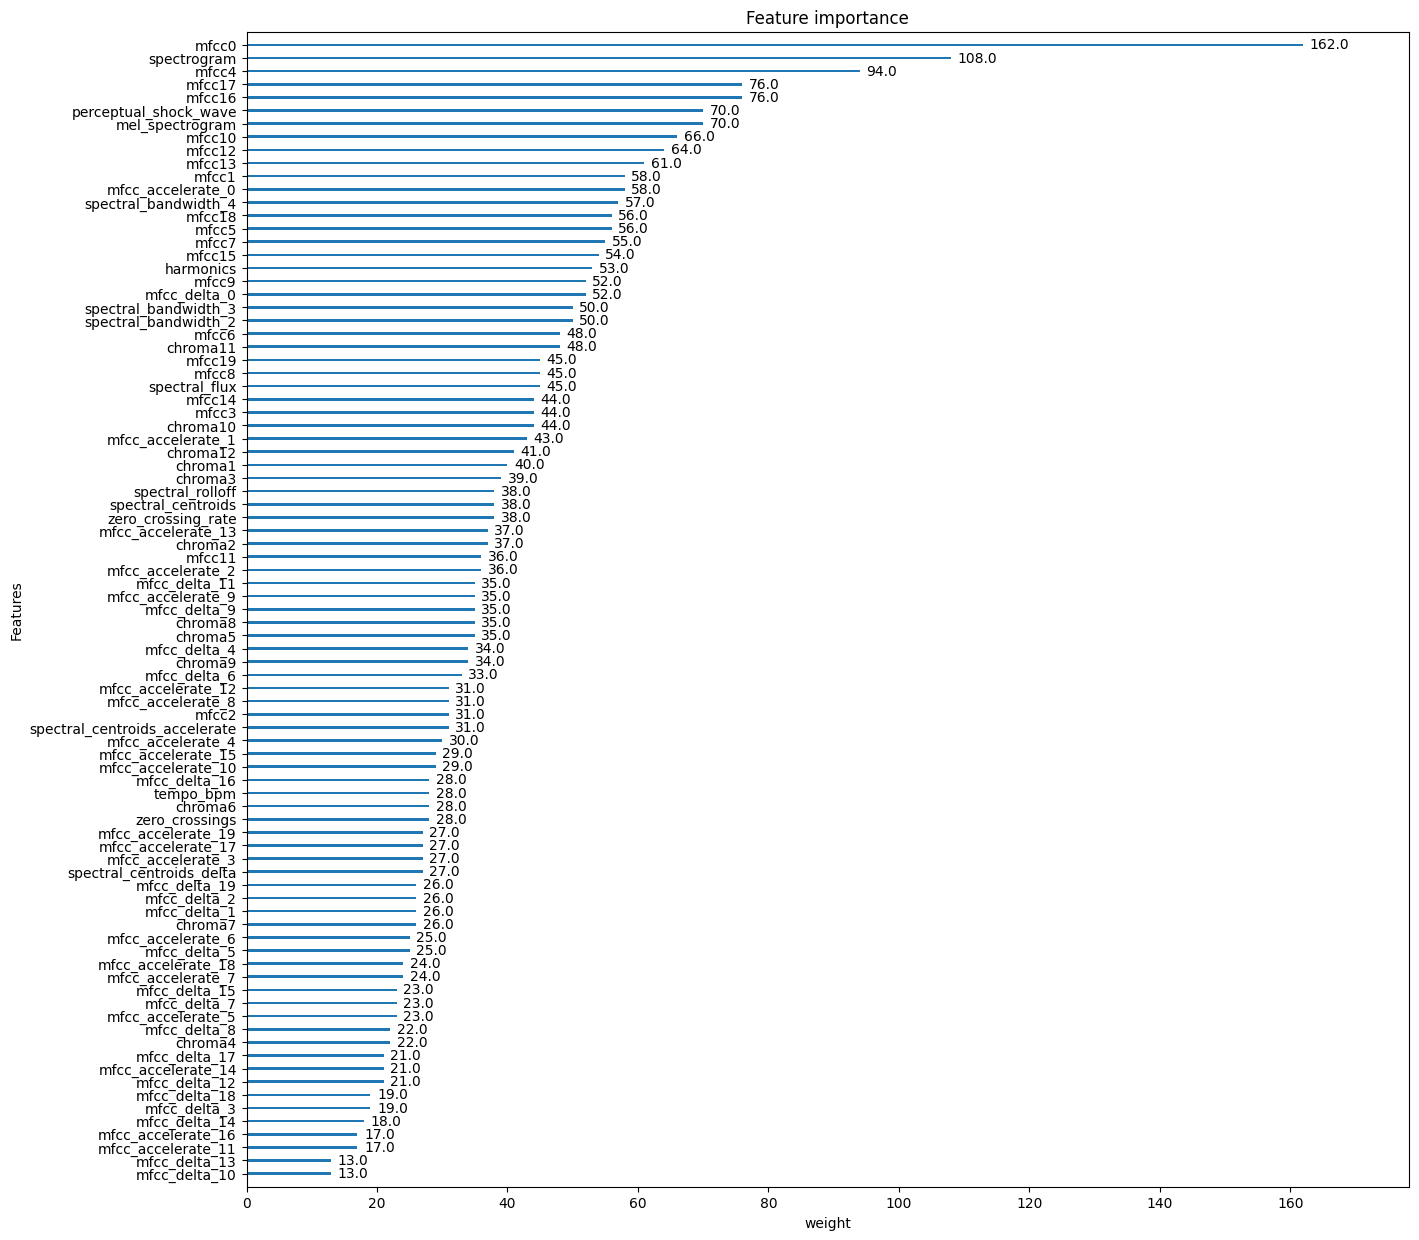

In [50]:
fig, ax = pyplot.subplots(figsize = (15,15))
plot_importance(xgb, ax = ax, grid = False, xlabel = 'weight')
pyplot.show()